<a href="https://colab.research.google.com/github/lild4d4/ARM-CPU/blob/main/%5BIPD440%5D_Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1

</br>

#### Integrante

|Name|Rol|Rut|Email|
|:--:|:----------:|:----------:|:----------:|
| Daniel Arevalos Ortiz| 201704124-2 | 20211697-3 | daniel.arevalos@sansano.usm.cl

In [ ]:
import os
import sys

!git clone https://gitlab.com/lild4d4/ipd-440-tarea-1.git


#!cp ipd-440-tarea-1/pyscripts/tools.py .

path = os.path.abspath("ipd-440-tarea-1/pyscripts")
sys.path.append(path)

Cloning into 'ipd-440-tarea-1'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 53 (delta 5), reused 0 (delta 0), pack-reused 39
Receiving objects: 100% (53/53), 5.74 MiB | 26.25 MiB/s, done.
Resolving deltas: 100% (15/15), done.


## Problema 1.


Dependencias y dataset:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys
from tools import MnistPlotter, read_mnist, image2vec, vec2image

!cd ipd-440-tarea-1/dataset/ && { curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz ; cd -; } &> /dev/null
!cd ipd-440-tarea-1/dataset/ && { curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz ; cd -; } &> /dev/null
!cd ipd-440-tarea-1/dataset/ && { gunzip t*-ubyte.gz ; cd -; } &> /dev/null
!cd ipd-440-tarea-1/dataset/ && { python3 setup_dataset.py ; cd -; } &> /dev/null

### Ejercicio 1.

Se realiza PCA sobre todos los 10 digitos que hay en el dataset:

In [ ]:
# parameters
n_components = 10
digits = [0,1,2,3,4,5,6,7,8,9]

# read data
images, labels = read_mnist()
mask = np.array([l in digits for l in labels])
images = images[mask]
labels = labels[mask]

# setup
plotter = MnistPlotter()

# run PCA
X = np.array([image2vec(im) for im in images])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_rec = pca.inverse_transform(X_pca)
images_rec = [vec2image(x) for x in X_rec]

### Ejercicio 2.

Se grafican las primeras 10 componentes del PCA como imagenes:

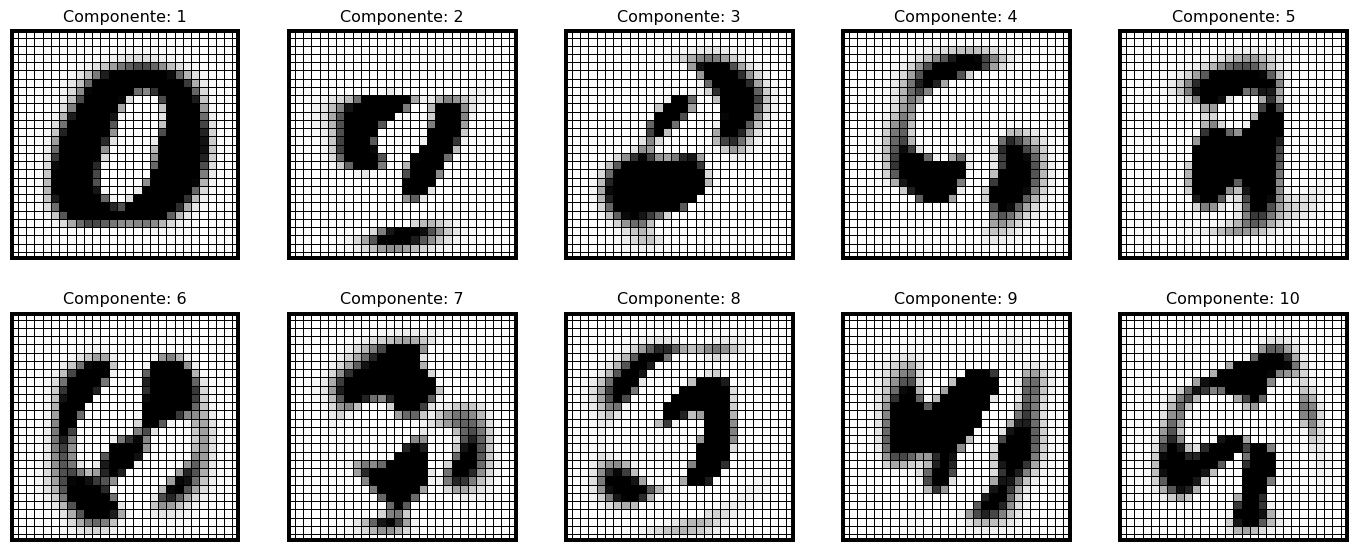

In [ ]:
# plot principal images
n = 10
fig = plt.figure(figsize=(18, 7), dpi=96)
for i in range(n):
    ax = fig.add_subplot(2, 5, i + 1)
    image = 26 * vec2image(pca.components_[i])
    plotter._draw_single_image(ax, image, label=None, title="Componente: " + str(i + 1))
plt.show()

### Ejercicio 3

Grafico de las 2 primeras componentes como puntos en el espacio:

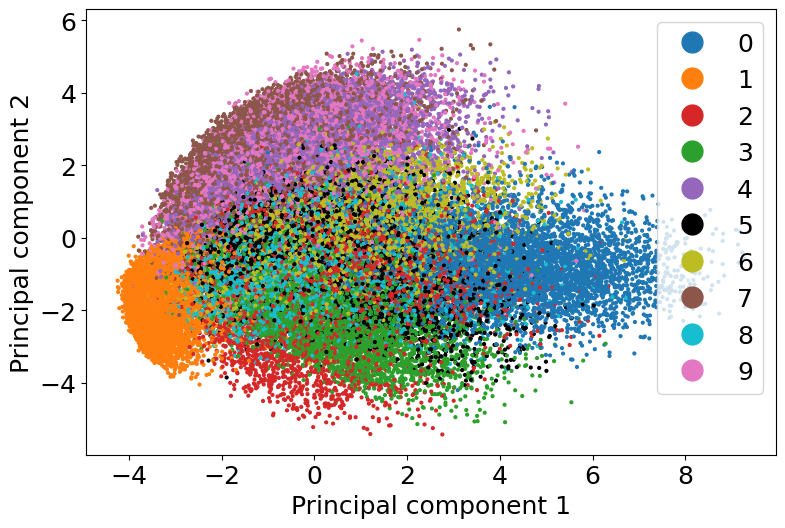

In [ ]:
# colors
color_dict = {0: 'tab:blue',
              1: 'tab:orange',
              2: 'tab:red',
              3: 'tab:green',
              4: 'tab:purple',
              5: 'k',
              6: 'tab:olive',
              7: 'tab:brown',
              8: 'tab:cyan',
              9: 'tab:pink'}
colors = [color_dict[l] for l in labels]

# plot params
ms1 = 4
ms2 = 15
fs = 18

# setup
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)

# plot clustering
for ax, i in zip([ax1], [1]):
    x = X_pca[:, 0]
    y = X_pca[:, i]
    ax.scatter(x, y, c=colors, s=ms1)
    ax.set_xlabel('Principal component 1', fontsize=fs)
    ax.set_ylabel('Principal component {}'.format(i+1), fontsize=fs)
    ax.tick_params(labelsize=fs)

# legend
for d in digits:
    ax1.plot(np.nan, np.nan, 'o', ms=ms2, label=str(d), color=color_dict[d])
ax1.legend(loc=1, fontsize=fs)

fig.tight_layout()
plt.show()

### Ejercicio 4

Text(0, 0.5, 'Varianza')

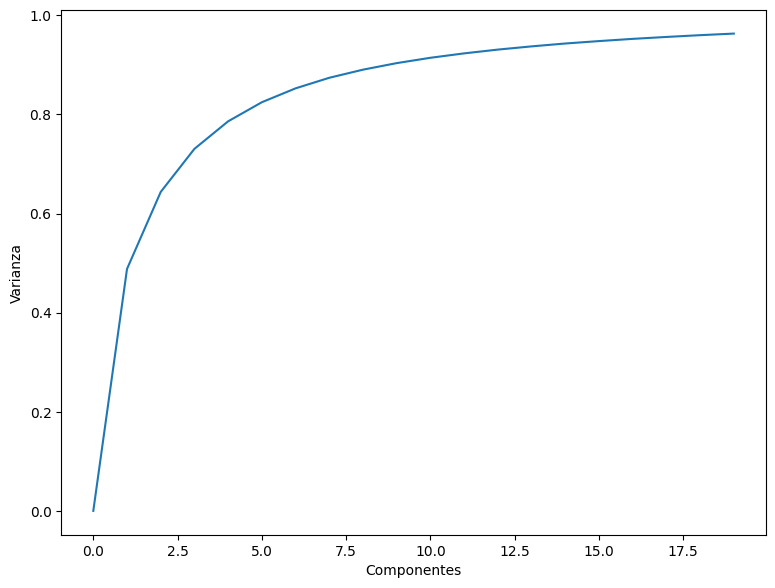

In [ ]:
variance=[]

steps = np.arange(0,200, 10)
for i in steps:
    # parameters
    n_components = i
    digits = [0,1,2,3,4,5,6,7,8,9]

    # read data
    images, labels = read_mnist()
    mask = np.array([l in digits for l in labels])
    images = images[mask]
    labels = labels[mask]

    # setup
    plotter = MnistPlotter()

    # run PCA
    X = np.array([image2vec(im) for im in images])
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_rec = pca.inverse_transform(X_pca)
    images_rec = [vec2image(x) for x in X_rec]

    # print result
    explained_variance = pca.explained_variance_ratio_.sum()
    #print('Using {} components, explained variance is {}'.format(n_components, explained_variance))
    variance.append(explained_variance)

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(221)
ax1.plot(variance)
ax1.set_xlabel('Componentes')
ax1.set_ylabel('Varianza')

array = np.asarray(variance)
idx = (np.abs(array - 0.9)).argmin()
print(steps[idx], variance[idx])

### Ejercicio 5

Se repiten los ejercicios anteriores pero para algunos digitos de forma individual:

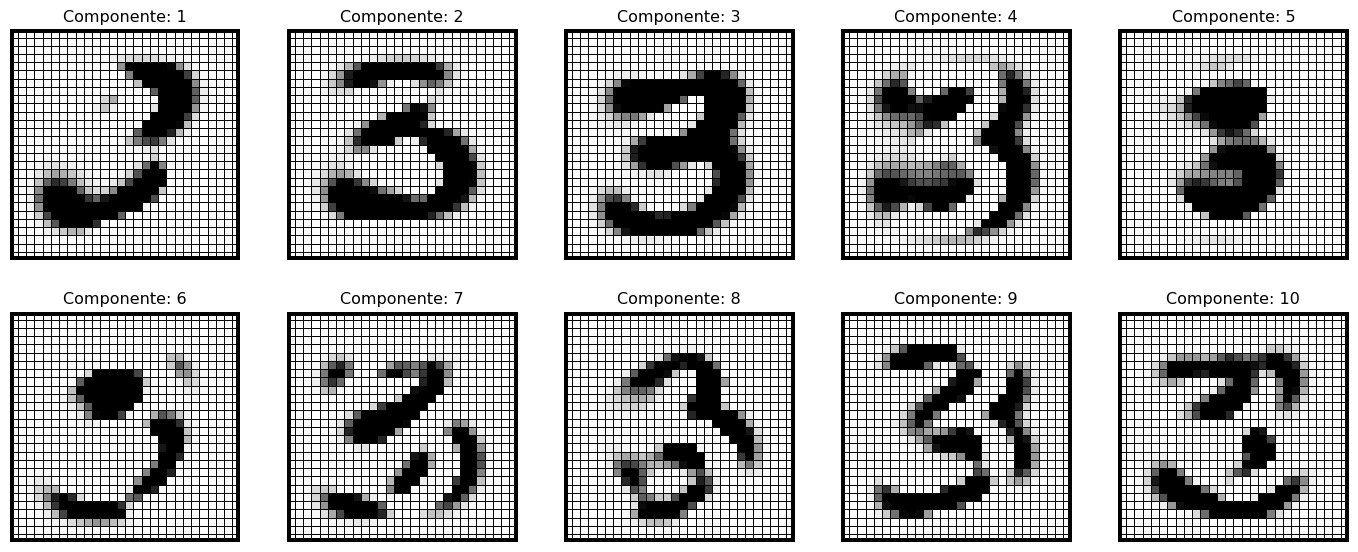

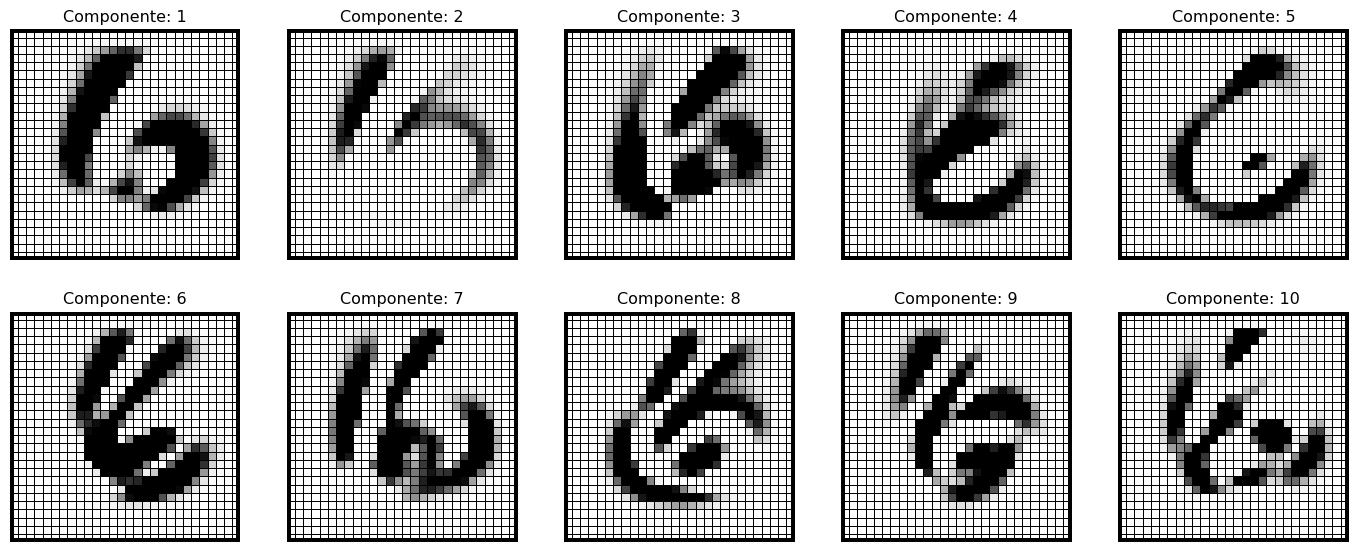

Text(0, 0.5, 'Varianza')

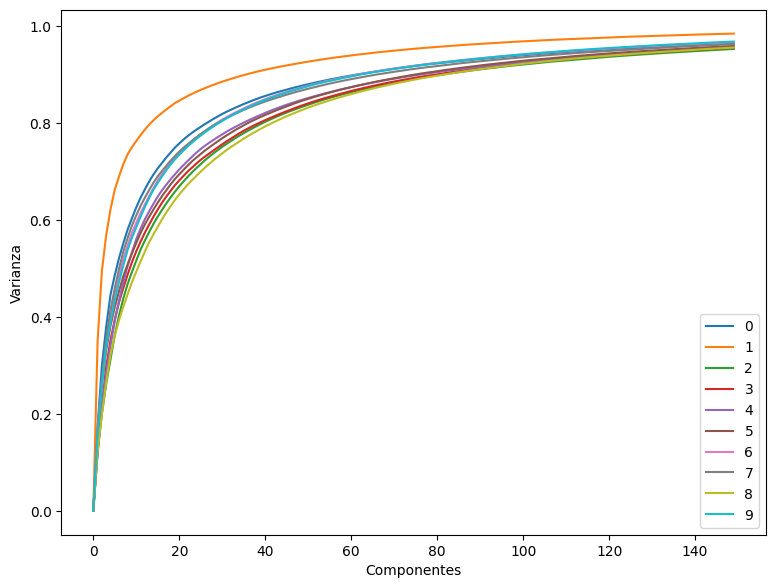

In [ ]:
############################# DIGITO 3 ############################
# parameters
n_components = 10
digits = [3]

# read data
images, labels = read_mnist()
mask = np.array([l in digits for l in labels])
images = images[mask]
labels = labels[mask]

# setup
plotter = MnistPlotter()

# run PCA
X = np.array([image2vec(im) for im in images])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_rec = pca.inverse_transform(X_pca)
images_rec = [vec2image(x) for x in X_rec]

# plot principal images
n = 10
fig = plt.figure(figsize=(18, 7), dpi=96)
for i in range(n):
    ax = fig.add_subplot(2, 5, i + 1)
    image = 26 * vec2image(pca.components_[i])
    plotter._draw_single_image(ax, image, label=None, title="Componente: " + str(i + 1))
plt.show()

############################# DIGITO 6 ###################################
# parameters
n_components = 10
digits = [6]

# read data
images, labels = read_mnist()
mask = np.array([l in digits for l in labels])
images = images[mask]
labels = labels[mask]

# setup
plotter = MnistPlotter()

# run PCA
X = np.array([image2vec(im) for im in images])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_rec = pca.inverse_transform(X_pca)
images_rec = [vec2image(x) for x in X_rec]

# plot principal images
n = 10
fig = plt.figure(figsize=(18, 7), dpi=96)
for i in range(n):
    ax = fig.add_subplot(2, 5, i + 1)
    image = 26 * vec2image(pca.components_[i])
    plotter._draw_single_image(ax, image, label=None, title="Componente: " + str(i + 1))
plt.show()

########################## VARIANZA TODOS LOS DIGITOS INDIVIDUALES #####################

general_variance=[]
time = []

for j in range(10):
    variance=[]
    for i in range(150):
        # parameters
        n_components = i
        digits = [j]

        # read data
        images, labels = read_mnist()
        mask = np.array([l in digits for l in labels])
        images = images[mask]
        labels = labels[mask]

        # setup
        plotter = MnistPlotter()

        # run PCA
        X = np.array([image2vec(im) for im in images])
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X)
        X_rec = pca.inverse_transform(X_pca)
        images_rec = [vec2image(x) for x in X_rec]

        # print result
        explained_variance = pca.explained_variance_ratio_.sum()
        variance.append(explained_variance)
    general_variance.append(variance)

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(221)
for var in general_variance:
    ax1.plot(var)

ax1.legend(['0','1','2','3','4','5','6','7','8','9'])
ax1.set_xlabel('Componentes')
ax1.set_ylabel('Varianza')

## Problema 2

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root = "./data", train=True, download = True, transform=transform)
valid_dataset = torchvision.datasets.MNIST(root = "./data", train=False, download = True, transform=transform)

In [ ]:
train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=100)

### Encoder

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_size=28*28, hidden_size1=128, hidden_size2=16, z_dim=2):
        super().__init__()
        self.fc1=nn.Linear(input_size, hidden_size1)
        self.fc2=nn.Linear(hidden_size1, hidden_size2)
        self.fc3=nn.Linear(hidden_size2, z_dim)
        self.relu = nn.ReLU()
    def forward(self, x):
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x

### Decoder

In [ ]:
class Decoder(nn.Module):
    def __init__(self, output_size=28*28, hidden_size1=128, hidden_size2=16, z_dim=2):
        super().__init__()
        self.fc1=nn.Linear(z_dim, hidden_size2)
        self.fc2=nn.Linear(hidden_size2, hidden_size1)
        self.fc3=nn.Linear(hidden_size1, output_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=torch.sigmoid(self.fc3(x))
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
enc = Encoder().to(device)
dec = Decoder().to(device)
loss_fn = nn.MSELoss()
optimizer_enc = torch.optim.Adam(enc.parameters())
optimizer_dec = torch.optim.Adam(dec.parameters())

In [ ]:
train_loss = []
num_epochs = 400
for epoch in range(num_epochs):
    train_epoch_loss = 0
    for (imgs, _) in train_dl:
        imgs = imgs.to(device)
        imgs = imgs.flatten(1)
        latents = enc(imgs)
        output = dec(latents)
        loss = loss_fn(output, imgs)
        train_epoch_loss += loss.cpu().detach().numpy()
        optimizer_enc.zero_grad()
        optimizer_dec.zero_grad()
        loss.backward()
        optimizer_enc.step()
        optimizer_dec.step()
    train_loss.append(train_epoch_loss)

20.98111331090331

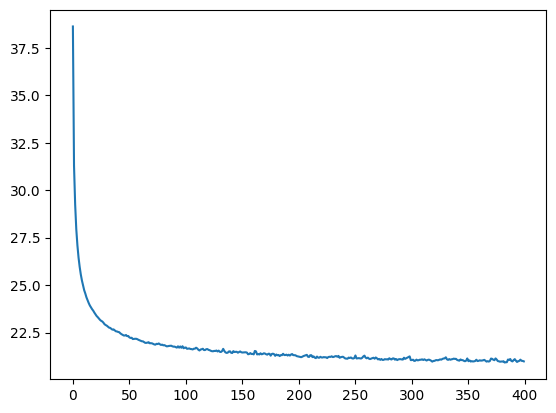

In [ ]:
plt.plot(train_loss)
train_loss[399]

In [ ]:
values = None
all_labels = []

with torch.no_grad():
  for (imgs , labels) in train_dl:
    imgs = imgs.to(device)
    imgs = imgs.flatten(1)
    all_labels.extend(list(labels.numpy()))
    latents = enc(imgs)
    if values is None:
      values = latents.cpu()
    else:
      values = torch.vstack([values , latents.cpu()])

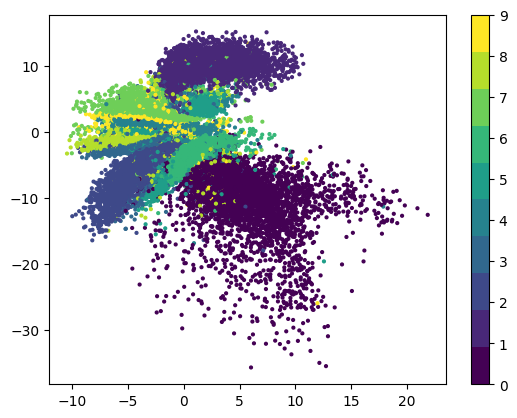

In [ ]:
cmap = plt.get_cmap('viridis', 10)
all_labels = np.array(all_labels)
values = values.numpy()
pc = plt.scatter(values[: , 0] , values[: , 1] , c = all_labels , cmap = cmap, s=4)
plt.colorbar(pc)

{0: (4.7008066, -9.388361),
 1: (0.9460083, 8.806963),
 2: (-3.0692868, -4.465605),
 3: (-2.854758, -1.512458),
 4: (-1.5743368, 0.731383),
 5: (-2.0771828, -0.7414223),
 6: (0.4433996, -3.3826027),
 7: (-2.2809913, 2.893082),
 8: (-3.0646508, -0.92392075),
 9: (-1.7632622, 1.2615067)}

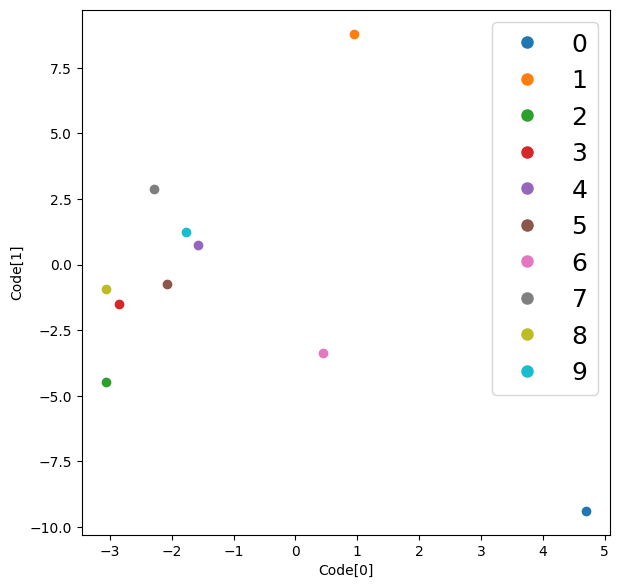

In [ ]:
all_means = {}
for i in range(10):
  inds = np.argwhere(all_labels == i)
  num_latents = values[inds].squeeze()
  mean = num_latents.mean(axis = 0)
  all_means[i] = (mean[0] , mean[1])


fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
j=0
for i in all_means.values():
  ax1.scatter(i[0], i[1])
  ax1.plot(np.nan, np.nan, 'o', ms=8, label=str(j))
  j+=1
ax1.legend(loc=1, fontsize=fs)
ax1.set_xlabel('Code[0]')
ax1.set_ylabel('Code[1]')
all_means

In [ ]:
with torch.no_grad():
  pred = dec(torch.Tensor(all_means[5])[None , ...].to(device)).cpu()
transforms.ToPILImage()(pred.reshape(1 , 28 , 28))

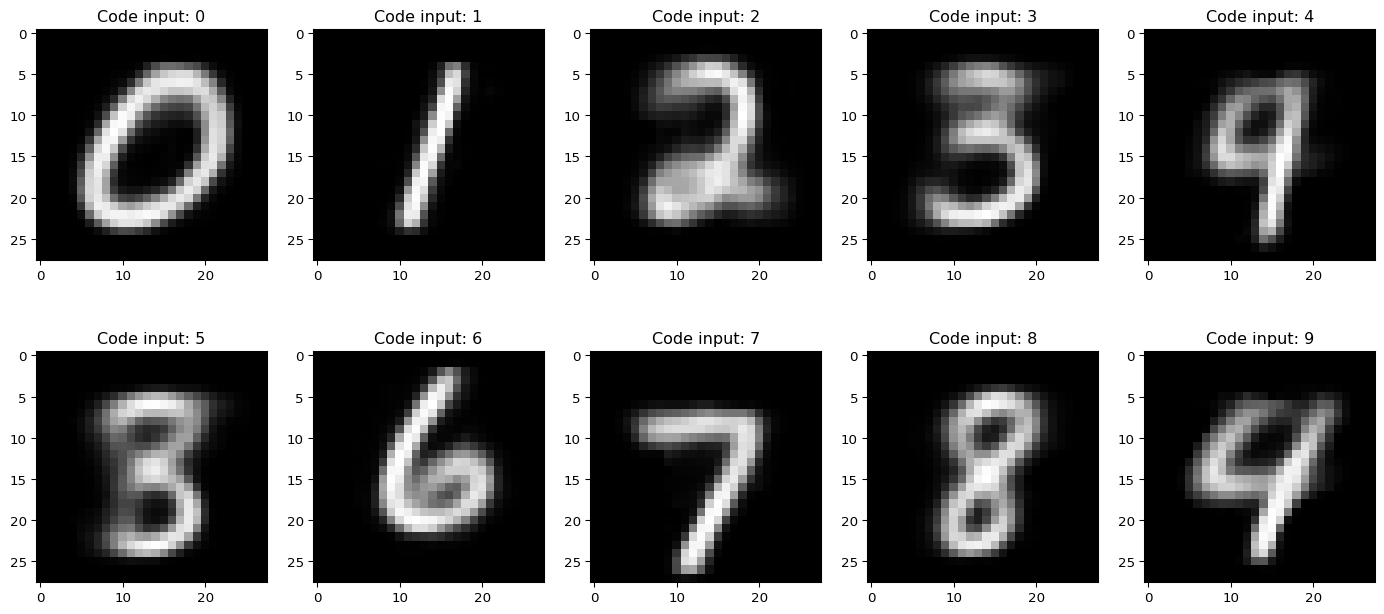

In [ ]:
fig = plt.figure(figsize=(18, 8), dpi=96)
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    with torch.no_grad():
      pred = dec(torch.Tensor(all_means[i])[None , ...].to(device)).cpu()
    ax.imshow(transforms.ToPILImage()(pred.reshape(1 , 28 , 28)), cmap = "gray")
    plt.title('Code input: '+str(i))
plt.show()